(512, 768, 3)


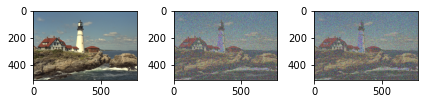

In [1]:
from torch.utils.data import DataLoader
from torchvision import transforms
import torch.nn.functional as F
import test_train
import unet_model
import matplotlib.pyplot as plt
import numpy as np
from skimage import io

class Normalize:
    def __call__(self, sample):
        return sample / 255

model = unet_model.UNet(3,3)
dataset = test_train.MyDataset('kodak', 
                    transform=transforms.Compose([test_train.Resize((512,768)),
                                                  Normalize(),
                                                  test_train.ToTensor()]))
dataloader = DataLoader(dataset, batch_size=4, shuffle=True, num_workers=0)
di = iter(dataloader)
clean, nois1, nois2 = next(di)

ci = (clean.numpy()[0] * 255).transpose(1,2,0).astype(np.uint8)
n1 = (nois1.numpy()[0] * 255).transpose(1,2,0).astype(np.uint8)
n2 = (nois2.numpy()[0] * 255).transpose(1,2,0).astype(np.uint8)

io.imsave("noise1.png", n1)
io.imsave("noise2.png", n2)
print(ci.shape)

plt.subplot(1,3,1)
plt.imshow(ci)
plt.tight_layout()
plt.subplot(1,3,2)
plt.imshow(n1)
plt.tight_layout()
plt.subplot(1,3,3)
plt.imshow(n2)
plt.tight_layout()
plt.savefig('test_noise.png')

In [2]:
model = unet_model.UNet(3,3)
print(nois1.dtype, nois1.shape)
# https://stackoverflow.com/questions/60239051/pytorch-runtimeerror-expected-object-of-scalar-type-double-but-got-scalar-type
reconstructed_image = model(nois1)

torch.float32 torch.Size([4, 3, 512, 768])


In [3]:
print(reconstructed_image.shape)

torch.Size([4, 3, 512, 768])


In [3]:
import torch
def imagesToPsnr(img1, img2):
        B = img1.shape[0]
        mse = F.mse_loss(img1, img2, reduction='none').reshape(B, -1)
        mse = torch.mean(mse,1).detach().numpy() + 1e-16
        psnr = 10 * np.log10(1/mse)
        return psnr
psnr = imagesToPsnr(reconstructed_image, clean)
print(psnr)

[2.642713  1.7909981 3.6075106 2.335454 ]
